In [1]:
import tensorflow as tf

In [2]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [5]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import cv2

# Define constants
image_height, image_width = 60, 60  # Adjust these based on your requirements
batch_size = 32

# Define your data directory
data_dir = 'datasets\\new dataset\\augdata'

# Define a custom preprocessing function
def preprocess_image(img,y):
    # img = tf.image.resize(img, [86, 86])
    img = tf.image.rgb_to_grayscale(img)
    img = img / 255.0  # Normalize pixel values to be between 0 and 1
    return img,y

# Create training data generator
train_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=(image_height, image_width),
    batch_size=batch_size,
    color_mode='rgb',  # specify that images are RGB
    validation_split=0.2,
    subset='training',
    seed=42
)

# Apply the custom preprocessing function
train_dataset = train_dataset.map(preprocess_image)

# Create validation data generator
val_dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    labels='inferred',
    label_mode='categorical',
    image_size=(image_height, image_width),
    batch_size=batch_size,
    color_mode='rgb',
    validation_split=0.2,
    subset='validation',
    seed=42
)

# Apply the custom preprocessing function
val_dataset = val_dataset.map(preprocess_image)



Found 16648 files belonging to 5 classes.
Using 13319 files for training.
Found 16648 files belonging to 5 classes.
Using 3329 files for validation.


Batch shape: (32, 60, 60, 1)


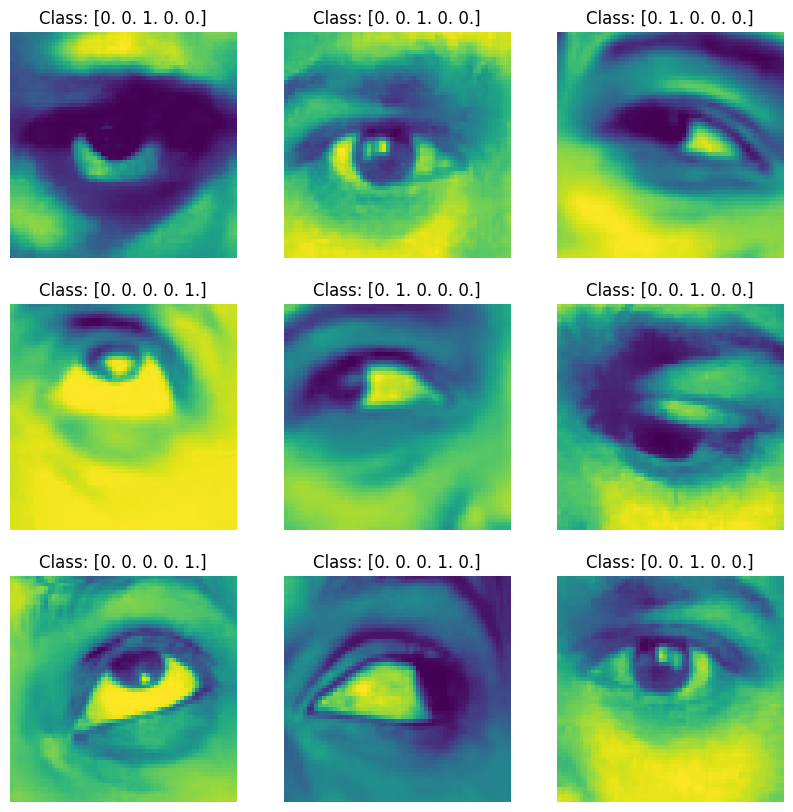

In [6]:
import matplotlib.pyplot as plt


for images, labels in train_dataset.take(1):
    # Print the shape of the batch
    print("Batch shape:", images.shape)

    # Display the images from the batch
    plt.figure(figsize=(10, 10))
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        plt.title(f"Class: {labels[i].numpy()}")
        plt.axis("off")
    plt.show()

In [5]:
# Build the CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu', input_shape=(60, 60, 1)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(16, (2, 2), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(8, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(121, activation='relu'),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 58, 58, 8)         80        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 29, 29, 8)        0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 16)        528       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 8)         1160      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 8)          0

In [12]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
checkpoint_callback = ModelCheckpoint('direction_models/best_model13.h5', monitor='val_loss', save_best_only=True)

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train the model
history = model.fit(
    train_dataset,
    epochs=100,  # adjust the number of epochs based on your needs
    validation_data=val_dataset,
    callbacks=[checkpoint_callback]
)

Epoch 1/100
417/417 [==============================] - 26s 48ms/step - loss: 0.9363 - accuracy: 0.6284 - val_loss: 0.5819 - val_accuracy: 0.7888
Epoch 2/100
417/417 [==============================] - 4s 9ms/step - loss: 0.5371 - accuracy: 0.8081 - val_loss: 0.4035 - val_accuracy: 0.8558
Epoch 3/100
417/417 [==============================] - 4s 10ms/step - loss: 0.4068 - accuracy: 0.8556 - val_loss: 0.2874 - val_accuracy: 0.8904
Epoch 4/100
417/417 [==============================] - 4s 10ms/step - loss: 0.3421 - accuracy: 0.8780 - val_loss: 0.2342 - val_accuracy: 0.9192
Epoch 5/100
417/417 [==============================] - 4s 10ms/step - loss: 0.2849 - accuracy: 0.9000 - val_loss: 0.2025 - val_accuracy: 0.9288
Epoch 6/100
417/417 [==============================] - 4s 10ms/step - loss: 0.2558 - accuracy: 0.9109 - val_loss: 0.1969 - val_accuracy: 0.9282
Epoch 7/100
417/417 [==============================] - 4s 10ms/step - loss: 0.2389 - accuracy: 0.9177 - val_loss: 0.1780 - val_accuracy:

In [7]:
from tensorflow.keras.models import load_model


# Load the trained model
loadedmodel = load_model("direction_models\\best_model12.h5") 
loadedmodel.evaluate(val_dataset)

105/105 [==============================] - 5s 10ms/step - loss: 0.0754 - accuracy: 0.9781


[0.07542643696069717, 0.9780715107917786]

In [5]:
import matplotlib.pyplot as plt
hist = history

NameError: name 'history' is not defined

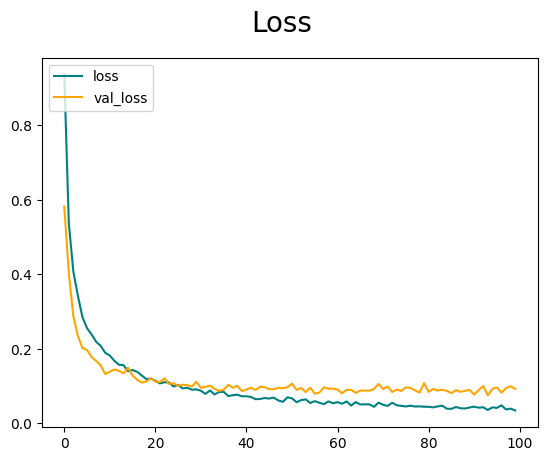

In [12]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

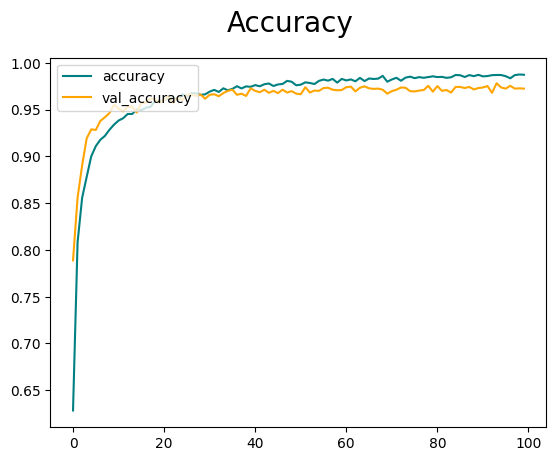

In [13]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [9]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt


1/1 [==============================] - 0s 117ms/step
[[9.90117133e-01 7.98915047e-03 1.08743705e-04 3.98308301e-04
  1.38668658e-03]]
Predicted class: down


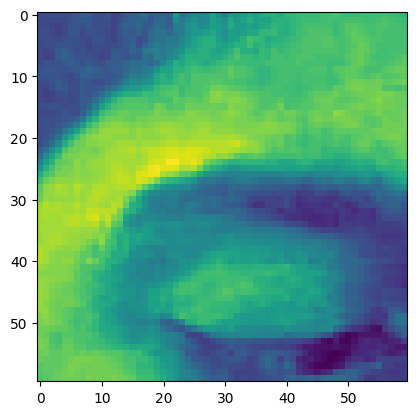

In [10]:

# Load and preprocess a single image
def preprocess_single_image(file_path):
    img = cv2.imread(file_path)
    img = tf.image.rgb_to_grayscale(img)
    img = tf.image.resize(img, [60, 60])
    img = img / 255.0  # Normalize pixel values to be between 0 and 1
    img = np.expand_dims(img, axis=0)  # Add a batch dimension
    return img

# Path to your single test image
single_image_path = 'datasets\\augdata\\bottom\\2eye_left1_88 - Copy.0.jpg'

# Preprocess the single image
preprocessed_image = preprocess_single_image(single_image_path)


# Get predictions for the preprocessed image
predictions = loadedmodel.predict(preprocessed_image)

plt.imshow(preprocessed_image[0])
predicted_class = np.argmax(predictions)
classes = ['down','left','straight','right','up']
print(predictions)
print(f'Predicted class: {classes[predicted_class]}')

## testing 

In [14]:
import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
import os
import time


detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')


def coordi(l,m,w):
    x = int(l-w*0.84)
    y = int(m-w*0.84)
    p = int(l+w*0.84)
    q = int(m+w*0.84)
    return [(x,y),(p,q)]

def preprocess_single_image(img):
    img = cv2.resize(img, (60, 60)).reshape((1, 60, 60, 1)).astype('float32') /255.0
    # print(img)
    # img = img / 255.0  # Normalize pixel values to be between 0 and 1
    # img = np.expand_dims(img, axis=0)  # Add a batch dimension
    return img


# Initialize the webcam
cap = cv2.VideoCapture(0)
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080) 


while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale for face and eye detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the grayscale frame
    faces = detector(gray)

    for face in faces:
        ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale for face and eye detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale frame
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        # Extract eye region landmarks
        left_eye_landmarks = [landmarks.part(i) for i in range(36, 42)]
        right_eye_landmarks = [landmarks.part(i) for i in range(42, 48)]
        x1 ,y1 = left_eye_landmarks[0].x,left_eye_landmarks[0].y
        p1, q1 = left_eye_landmarks[3].x,left_eye_landmarks[3].y
        x2 ,y2 = right_eye_landmarks[0].x,right_eye_landmarks[0].y
        p2, q2 = right_eye_landmarks[3].x,right_eye_landmarks[3].y
        w1 = math.sqrt((x1 - p1)**2 + (y1 - q1)**2)
        w2 = math.sqrt((x2 - p2)**2 + (y2 - q2)**2)
        
        left = coordi((x1+p1)/2,(y1+q1)/2,w1) 
        cv2.rectangle(frame, left[0], left[1], (0, 255, 0), 2)
        
        preprocessed_image = preprocess_single_image(gray[left[0][1]:left[1][1],left[0][0]:left[1][0]])
        predictions = loadedmodel.predict(preprocessed_image)
        predicted_class = np.argmax(predictions)
        classes = ['down','left','straight','right','up']
        
        cv2.putText(frame, f'Predicted Digit: {classes[predicted_class]}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        # width, height = left[1][1]-left[0][1], left[1][0]-left[0][0]

    # Display the frame with eye landmarks and numbers
    cv2.imshow("window",frame)

    # Exit the loop when 'q' is pressed
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

# (480, 640, 3)

1/1 [==============================] - 0s 17ms/step


## with safety mechanism

In [20]:
import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from pynput.mouse import Controller, Button
from tensorflow.keras.models import load_model


# Load the trained model
loadedmodel = load_model("direction_models\\best_model12.h5") 


# Create a mouse controller
mouse = Controller()


detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')


def coordi(l,m,w):
    x = int(l-w*0.85)
    y = int(m-w*0.85)
    p = int(l+w*0.85)
    q = int(m+w*0.85)
    return [(x,y),(p,q)]

def preprocess_eyes(img1,img2):
    img1 = cv2.resize(img1, (60, 60)).astype('float32') /255.0
    img2 = cv2.resize(img2, (60, 60)).astype('float32') /255.0
    stacked_images = np.expand_dims(np.stack([img1, img2]), axis=-1)
    return stacked_images

cap = cv2.VideoCapture(0)
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080) 

VALIDNOOFCLICKS = 4
framecount = 0


leftcount = 0
leftOnTime = None

rightcount = 0
rightOnTime = None

topcount = 0
topOnTime = None

bottomcount = 0
bottomOnTime = None


leftclickcount = 0
leftclickOnTime = None

rigthclickcount = 0
rightclickOnTime = None




initialMouse = [100,100]
direction = None #prediction class

classes = ['bottom','left','straight','right','top']

text = 'striaght'


while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale for face and eye detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the grayscale frame
    faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        
        left_eye_landmarks = [landmarks.part(i) for i in range(36, 42)]
        right_eye_landmarks = [landmarks.part(i) for i in range(42, 48)]
        x1 ,y1 = left_eye_landmarks[0].x,left_eye_landmarks[0].y
        p1, q1 = left_eye_landmarks[3].x,left_eye_landmarks[3].y
        x2 ,y2 = right_eye_landmarks[0].x,right_eye_landmarks[0].y
        p2, q2 = right_eye_landmarks[3].x,right_eye_landmarks[3].y
        w1 = math.sqrt((x1 - p1)**2 + (y1 - q1)**2)
        w2 = math.sqrt((x2 - p2)**2 + (y2 - q2)**2)
        
        left = coordi((x1+p1)/2,(y1+q1)/2,w1) 
        right = coordi((x2+p2)/2,(y2+q2)/2,w2)

        cv2.rectangle(frame, left[0], left[1], (0, 255, 0), 2)
        cv2.rectangle(frame, right[0], right[1], (0, 255, 0), 2)
        
        preprocessed_image = preprocess_eyes(gray[left[0][1]:left[1][1],left[0][0]:left[1][0]],gray[right[0][1]:right[1][1],right[0][0]:right[1][0]])

        predictions = loadedmodel.predict(preprocessed_image,verbose=0)
        predicted_left_class = np.argmax(predictions[0])
        predicted_right_class = np.argmax(predictions[1])

       


        if(predicted_left_class != predicted_right_class and predicted_right_class != 0) :
            if predicted_right_class != 2:
                predicted_left_class = predicted_right_class
        
        
        if(predicted_left_class == 0 and predicted_right_class != 0):
            if(leftclickOnTime == None):
                leftclickOnTime = framecount
            leftclickcount += 1
        elif (predicted_left_class != 0 and predicted_right_class == 0):
            if(rightclickOnTime == None):
                rightclickOnTime = framecount
            rigthclickcount += 1
        elif (predicted_left_class == 0): 
            if(bottomOnTime == None):
                bottomOnTime = framecount
            bottomcount +=1
        elif (predicted_left_class == 1): 
            if(leftOnTime == None):
                leftOnTime = framecount
            leftcount +=1
        elif (predicted_left_class == 3): 
            if(rightOnTime == None):
                rightOnTime = framecount
            rightcount +=1
        elif (predicted_left_class == 4): 
            if(topOnTime == None):
                topOnTime = framecount
            topcount +=1
        
            
        text = 'straight'

        if(bottomOnTime != None and bottomOnTime+6 <= framecount):
            if(bottomcount >= VALIDNOOFCLICKS):
                text = "down"
                direction = 0
                
            bottomcount = 0
            bottomOnTime = None
        if(leftOnTime != None and leftOnTime+6 <= framecount):
            if(leftcount >= VALIDNOOFCLICKS):
                text = "left"
                direction = 1
                
            leftcount = 0
            leftOnTime = None
        if(rightOnTime != None and rightOnTime+6 <= framecount):
            if(rightcount >= VALIDNOOFCLICKS):
                text = "right"
                direction = 3
                
            rightcount = 0
            rightOnTime = None
        if(topOnTime != None and topOnTime+6 <= framecount):
            if(topcount >= VALIDNOOFCLICKS):
                text = "up"
                direction = 4
                
            topcount = 0
            topOnTime = None

        if(leftclickOnTime != None and leftclickOnTime+6 <= framecount):
            if(leftclickcount >= 4):
                text = 'right click'
                mouse.click(Button.right)
                direction = None
                
            leftclickcount = 0
            leftclickOnTime = None
        
        if(rightclickOnTime != None and rightclickOnTime+6 <= framecount):
            if(rigthclickcount >= 4):
                text = 'left click'
                mouse.click(Button.left)
                direction = None
                
            rigthclickcount = 0
            rightclickOnTime = None



        cv2.putText(frame, f'Predicted Digit: {text}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)

        if(direction == None):
            break
        elif direction == 0 :
            initialMouse[1]=initialMouse[1]+10
        elif direction == 1 :
            initialMouse[0]=initialMouse[0]+10
        elif direction == 3 :
            initialMouse[0]=initialMouse[0]-10
        elif direction == 4 :
            initialMouse[1]=initialMouse[1]-10
            

        initialMouse[0] = min(1920,initialMouse[0])
        initialMouse[0] = max(0,initialMouse[0])
        initialMouse[1] = min(1080,initialMouse[1])
        initialMouse[1] = max(0,initialMouse[1])
        

        mouse.position = (initialMouse[0], initialMouse[1])

        
        

        
    
    
    cv2.imshow("window",frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    framecount += 1

cap.release()
cv2.destroyAllWindows()

## no safety mechanism

In [19]:
import dlib
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math
from pynput.mouse import Controller, Button

# Create a mouse controller
mouse = Controller()


detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor('shape_predictor_68_face_landmarks.dat')


def coordi(l,m,w):
    x = int(l-w*0.85)
    y = int(m-w*0.85)
    p = int(l+w*0.85)
    q = int(m+w*0.85)
    return [(x,y),(p,q)]

def preprocess_eyes(img1,img2):
    img1 = cv2.resize(img1, (60, 60)).astype('float32') /255.0
    img2 = cv2.resize(img2, (60, 60)).astype('float32') /255.0
    stacked_images = np.expand_dims(np.stack([img1, img2]), axis=-1)
    return stacked_images

cap = cv2.VideoCapture(0)
# cap.set(cv2.CAP_PROP_FRAME_WIDTH, 1920)
# cap.set(cv2.CAP_PROP_FRAME_HEIGHT, 1080) 





initialMouse = [100,100]
direction = None #prediction class


while True:
    ret, frame = cap.read()
    if not ret:
        break

    # Convert the frame to grayscale for face and eye detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # Detect faces in the grayscale frame
    faces = detector(gray)

    # for face in faces:
    #     ret, frame = cap.read()
    # if not ret:
    #     break

    # # Convert the frame to grayscale for face and eye detection
    # gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

    # # Detect faces in the grayscale frame
    # faces = detector(gray)

    for face in faces:
        landmarks = predictor(gray, face)

        
        left_eye_landmarks = [landmarks.part(i) for i in range(36, 42)]
        right_eye_landmarks = [landmarks.part(i) for i in range(42, 48)]
        x1 ,y1 = left_eye_landmarks[0].x,left_eye_landmarks[0].y
        p1, q1 = left_eye_landmarks[3].x,left_eye_landmarks[3].y
        x2 ,y2 = right_eye_landmarks[0].x,right_eye_landmarks[0].y
        p2, q2 = right_eye_landmarks[3].x,right_eye_landmarks[3].y
        w1 = math.sqrt((x1 - p1)**2 + (y1 - q1)**2)
        w2 = math.sqrt((x2 - p2)**2 + (y2 - q2)**2)
        
        left = coordi((x1+p1)/2,(y1+q1)/2,w1) 
        right = coordi((x2+p2)/2,(y2+q2)/2,w2)
        # cv2.rectangle(frame, left[0], left[1], (0, 255, 0), 2)
        
        preprocessed_image = preprocess_eyes(gray[left[0][1]:left[1][1],left[0][0]:left[1][0]],gray[right[0][1]:right[1][1],right[0][0]:right[1][0]])

        predictions = loadedmodel.predict(preprocessed_image,verbose=0)
        predicted_left_class = np.argmax(predictions[0])
        predicted_right_class = np.argmax(predictions[1])

       
        
        classes = ['bottom','left','straight','right','top']


        if(predicted_left_class != predicted_right_class and predicted_right_class != 0) :
            if predicted_right_class != 2:
                predicted_left_class = predicted_right_class
        
        
        if(predicted_left_class == 0 and predicted_right_class != 0):
            mouse.click(Button.right)
            direction = None
        elif (predicted_left_class != 0 and predicted_right_class == 0):
            mouse.click(Button.left)
            direction = None
        elif predicted_left_class != 2 :
            direction = predicted_left_class
        
            

        if(direction == None):
            break
        elif direction == 0 :
            initialMouse[1]=initialMouse[1]+10
        elif direction == 1 :
            initialMouse[0]=initialMouse[0]+10
        elif direction == 3 :
            initialMouse[0]=initialMouse[0]-10
        elif direction == 4 :
            initialMouse[1]=initialMouse[1]-10
            



        mouse.position = (initialMouse[0], initialMouse[1])

        
        # cv2.putText(frame, f'Predicted Digit: {classes[predicted_class]}', (10, 50), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)


    
    
    
    
    
    cv2.imshow("window",frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

    framecount += 1

cap.release()
cv2.destroyAllWindows()